In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#we are creating our own dataset using non linear function. 
X=np.random.random((1000,2))*6-3 #we are taking (rows,column)=(1000,2) point between 0 to 1 and multiplying with 6 substacting with 3 to obtain result btw (-3,3)
Y=np.cos(2*X[:,0])+np.cos(2*X[:,1]) #non linear function

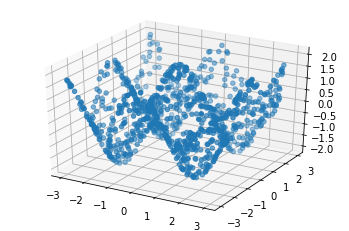

In [ ]:
#For 3d projection you have to write this 2 lines
fig = plt.figure() 
ax = plt.axes(projection ='3d') 
ax.scatter(X[:,0],X[:,1],Y)

In [ ]:
import tensorflow as tf
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,input_shape=(2,),activation='relu'),
  tf.keras.layers.Dense(1)
])

#You can use SGD also
#if you want to set learning rate using adam algorithm then set using below line
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse')

r=model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0170
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8872
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8130
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8453
Epoch 5/100
32/32 [==============================] - 0s 991us/step - loss: 0.7189
Epoch 6/100
32/32 [==============================] - 0s 981us/step - loss: 0.7299
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6094
Epoch 8/100
32/32 [==============================] - 0s 989us/step - loss: 0.4647
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3200
Epoch 10/100
32/32 [==============================] - 0s 999us/step - loss: 0.2473
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1625
Epoch 12/100
32/32 [==============================] - 0s 955us/step - loss: 0.0788
Epoch 13/100
32/32 [=======

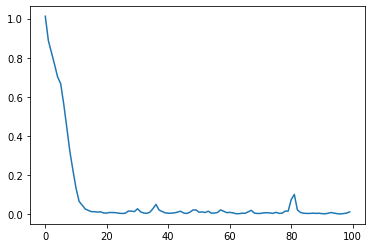

In [ ]:
plt.plot(r.history['loss'],label='loss')

In [ ]:
line=np.linspace(-3,3,50) #linspace is used to take 50 points uniformly btw (-3,3)
line

array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])

In [ ]:
# Link: https://www.geeksforgeeks.org/numpy-meshgrid-function/
xx,yy=np.meshgrid(line,line) #The meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Matrix indexing.
xx=xx.flatten()
xx

array([-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
        2.87755102,  3.        ])

In [ ]:
yy=yy.flatten() #we have to flatten it because we want 1-D array
yy

array([-3., -3., -3., ...,  3.,  3.,  3.])

In [ ]:
# arr1(1,2,3) 1-D array
# arr2(4,5,6) 1-D array
# after applying vstack function
# arr([1,2,3],[4,5,6]) 2-D array
# after transposing it
# arr([1,4],[2,5],[3,6])
Xgrid=np.vstack((xx,yy)).T # this is used to make 2-D array from 2 1-D arrays.We have to take transpose of it to make a data seem like X.
Xgrid

array([[-3.        , -3.        ],
       [-2.87755102, -3.        ],
       [-2.75510204, -3.        ],
       ...,
       [ 2.75510204,  3.        ],
       [ 2.87755102,  3.        ],
       [ 3.        ,  3.        ]])

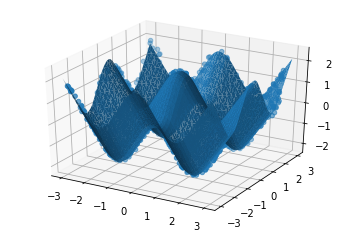

In [ ]:
fig = plt.figure() 
ax = plt.axes(projection ='3d') 
ax.scatter(X[:,0],X[:,1],Y)
yhat=model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],yhat) # plot_trisurf function is used to plot on 3-d surface
plt.show()